In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re,random
from numpy import linalg
from sklearn import svm
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,hamming_loss
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score,auc,pairwise_distances_argmin_min,pairwise_distances_argmin
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.special import softmax
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import xgboost as xgb
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# 1. (a)

In [4]:
trainData = pd.read_csv('aps_failure_training_set.csv',skiprows=20)
testData = pd.read_csv('aps_failure_test_set.csv',skiprows=20)

trainData.replace('na', np.nan, inplace=True)
testData.replace('na', np.nan, inplace=True)



In [5]:
xTrain = trainData.iloc[:,1:]
yTrain = trainData.iloc[:, 0]

xTest = testData.iloc[:,1:]
yTest = testData['class']
trainData

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,NaN,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,NaN,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [6]:
xTrain.isnull().sum()

aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 170, dtype: int64

# (b) i.

**Techniques:**
 
1.Hard-coding a raw value like -1 or -99999.<br>
2.Using frontfill or backfill.<br>
3.Use data imputation techinqies like filling with mean, median or mode.<br>
4.Use a predictive model like KNN or Regression or etc for the corresponding imputation.<br>

In [7]:
#fill missing values with mean

filler = SimpleImputer(missing_values=np.nan,strategy="mean")
filler.fit(xTrain)
xTrain = pd.DataFrame(filler.transform(xTrain))
filler.fit(xTest)
xTest = pd.DataFrame(filler.transform(xTest))
xTrain

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
0,76698.0,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002.0,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286.0,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112.0,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292.0,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


# (b) ii.

In [8]:
cv = lambda x: np.std(x) / np.mean(x)
var = np.apply_along_axis(cv, axis = 1, arr = np.array(xTrain).T)

var_ans = pd.DataFrame(var, columns=["varation"])
var_ans

,varation
0,2.450917
1,2.328381
2,2.169748
3,183.846088
4,23.190743
...,...
165,4.962441
166,3.221983
167,5.626932
168,47.124560


# (b) iii.

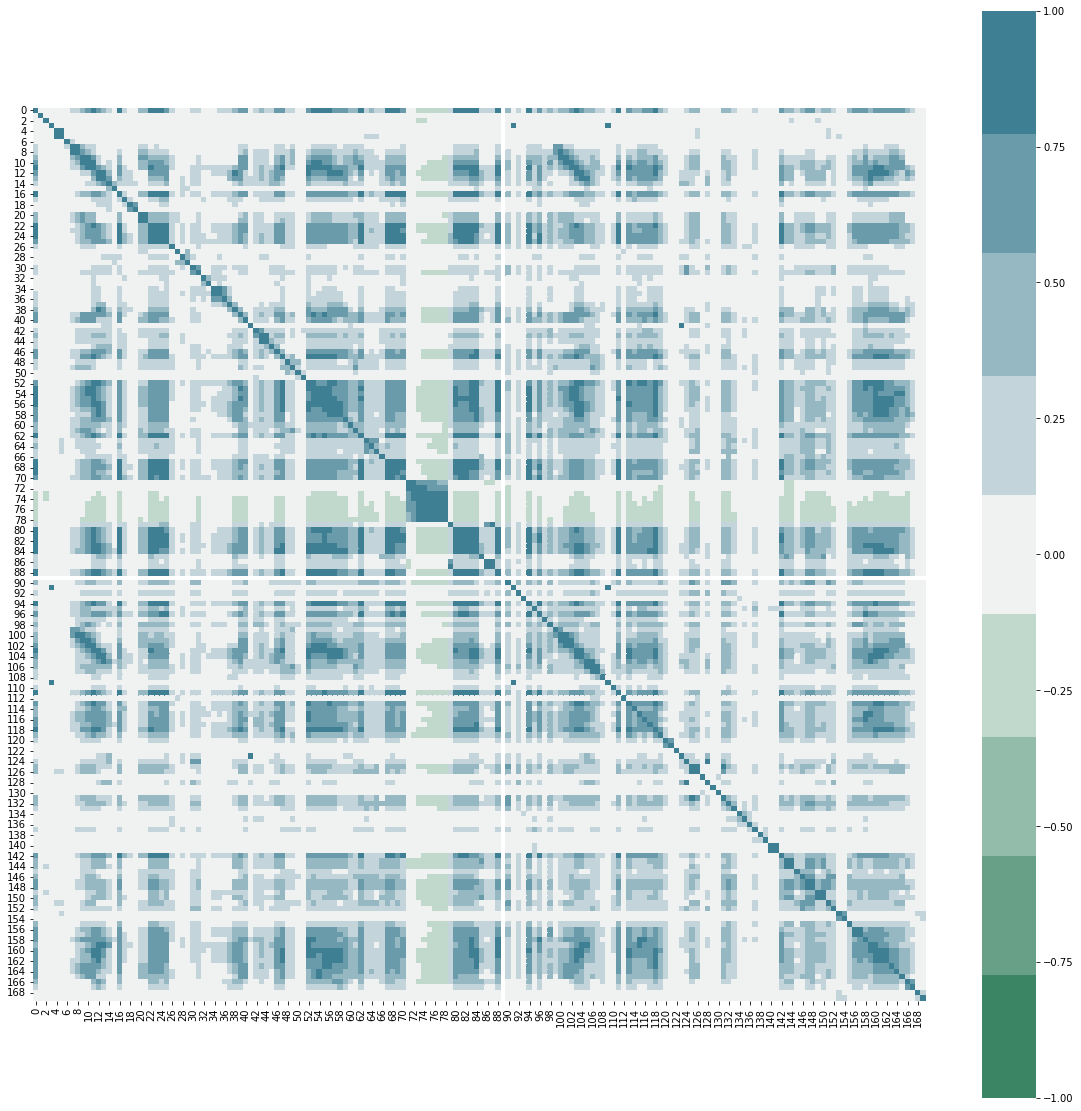

In [9]:
correlation = xTrain.corr()

ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlation, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(150, 220,n=9), square=True)

# (b) iv.

In [10]:
minval = math.floor(pow(170,0.5))
print('feature number', minval)
sorva = var_ans.sort_values('varation', ascending=False)

features = sorva[:minval].T
trainFeatures = xTrain.iloc[:, features.columns]
trainFeatures

feature number 13


,122,91,109,3,136,138,6,27,41,51,19,29,93
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,190221.810984,190515.566938,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000443
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,224.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59996,0.0,2.000000,0.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59997,0.0,2.000000,0.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
59998,0.0,2.000000,580.000000,494.000000,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


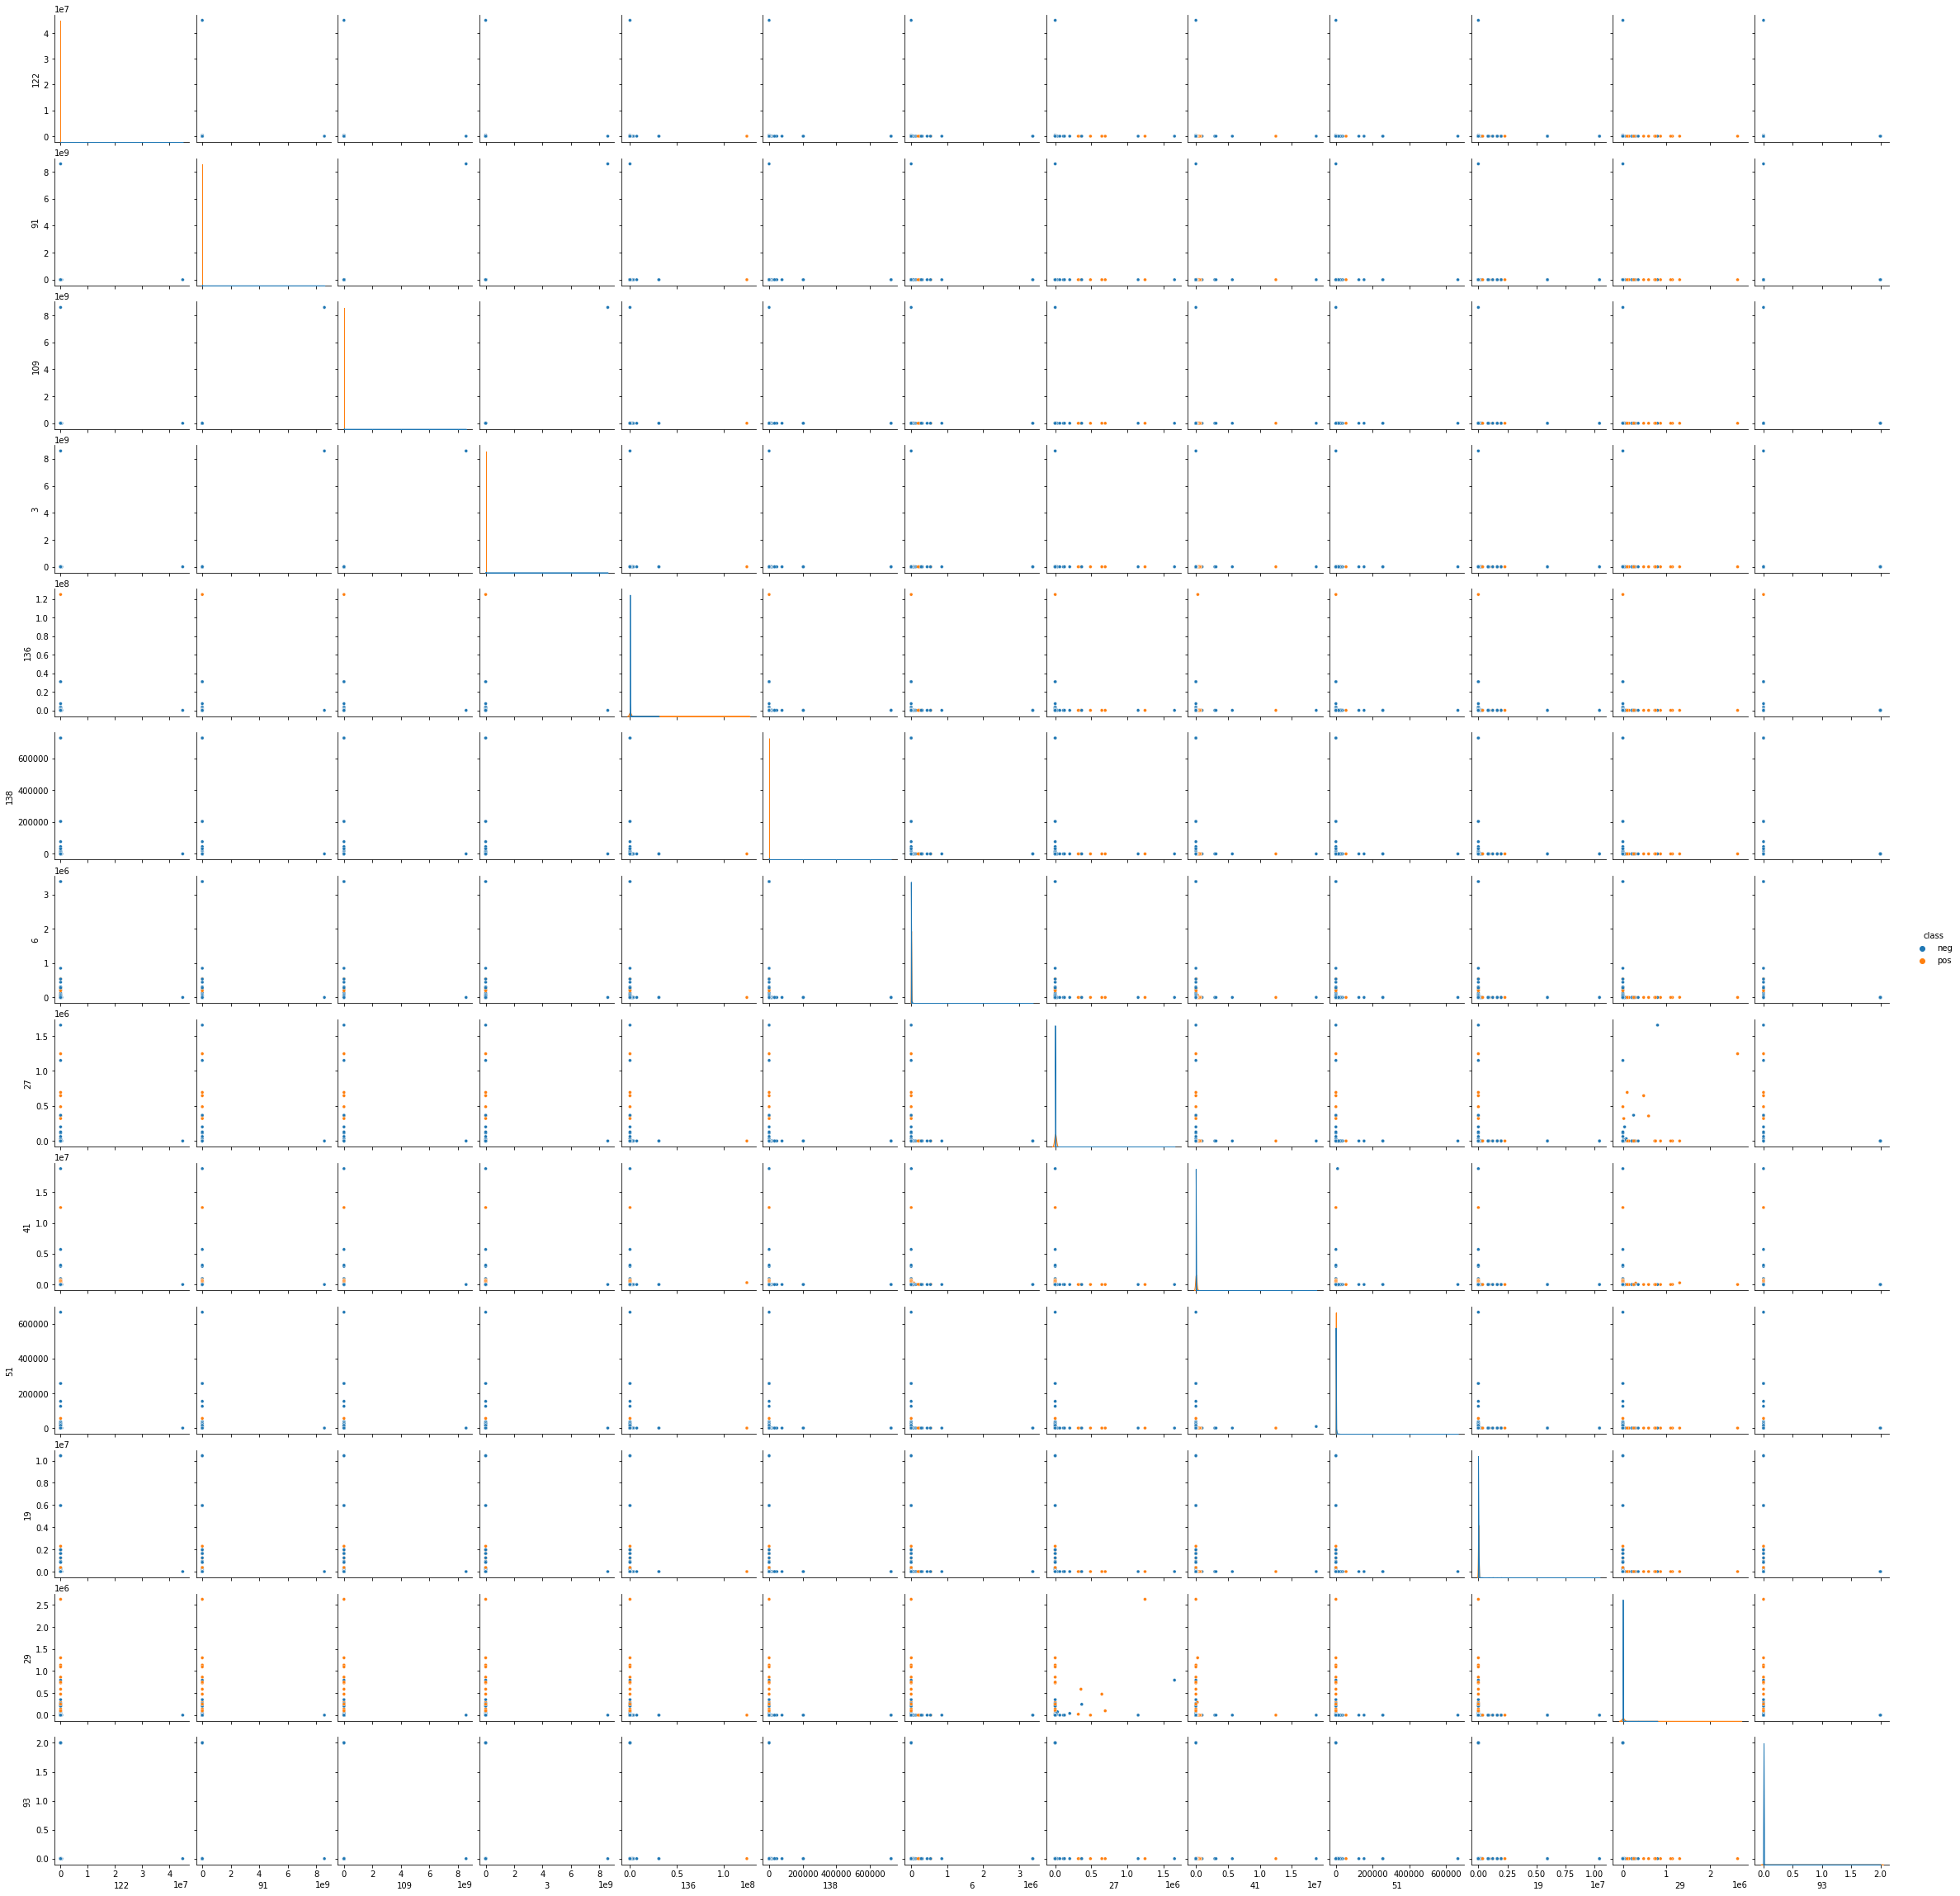

In [11]:
trainFeatures['class'] = yTrain
sns.pairplot(trainFeatures, plot_kws={'s':15}, hue='class')

I dont think any significant conclusions can be drawn here. It will definitely require more analysis.

# (b) v.

In [11]:
print('Train Data')
print(yTrain.value_counts())
print('Test Data')
print(yTest.value_counts())

Train Data
neg    59000
pos     1000
Name: class, dtype: int64
Test Data
neg    15625
pos      375
Name: class, dtype: int64


# (c).

In [12]:

newYTrain = yTrain.apply(lambda x: 0 if x=='neg' else 1)
newYTest = yTest.apply(lambda x: 0 if x=='neg' else 1)

clf = RandomForestClassifier(n_estimators=100, max_depth=2,oob_score=True)
clf.fit(xTrain, newYTrain)
yTrainPredict = clf.predict(xTrain)



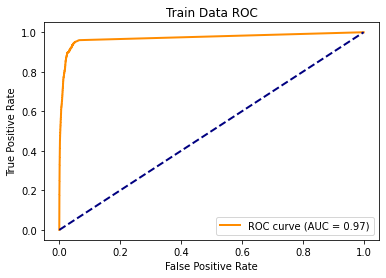

Train Data Confusion Matrix is:
[[58983    17]
 [  835   165]]
The Out of Bag error is: 0.014283333333333315
Misclassification rate is: 0.01419999999999999


In [13]:
yScore = clf.predict_proba(xTrain)[:, 1]

fpr,tpr,threshold = roc_curve(newYTrain, yScore)

roc_auc = auc(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data ROC')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.legend(loc="lower right")
plt.show()


confusionMatrix = confusion_matrix(newYTrain, yTrainPredict)
print('Train Data Confusion Matrix is:')
print(confusionMatrix)

print('The Out of Bag error is:', 1-clf.oob_score_)

print('Misclassification rate is:', 1-clf.score(xTrain, newYTrain))



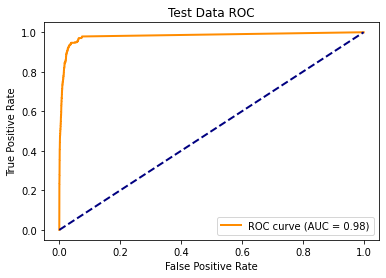

Test Data Confusion Matrix:
[[15624     1]
 [  314    61]]
Out of Bag error is: 0.014283333333333315
Misclassification rate is: 0.01968749999999997


In [14]:
yTestPredict = clf.predict(xTest)

yScore = clf.predict_proba(xTest)[:, 1]

fpr,tpr,threshold = roc_curve(newYTest, yScore)

roc_auc = auc(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data ROC')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.legend(loc="lower right")
plt.show()


confusionMatrix = confusion_matrix(newYTest, yTestPredict)
print('Test Data Confusion Matrix:')
print(confusionMatrix)

print('Out of Bag error is:', 1-clf.oob_score_)
print('Misclassification rate is:', 1-clf.score(xTest, newYTest))



# (d).

In [16]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
smoteXTrain, smoteYTrain = sm.fit_resample(xTrain, newYTrain)


clf = RandomForestClassifier(n_estimators=100, max_depth=2,oob_score=True)
clf.fit(smoteXTrain, smoteYTrain)
yTrainPredict = clf.predict(smoteXTrain)




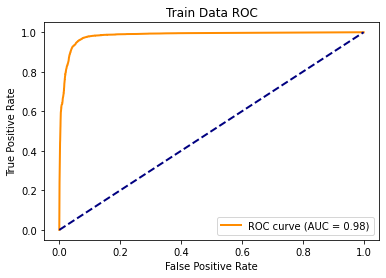

Train Data Confusion Matrix:
[[55327  3673]
 [ 2590 56410]]
Out of Bag error is: 0.05362711864406777
Misclassification rate is: 0.05307627118644065


In [17]:
yScore = clf.predict_proba(smoteXTrain)[:, 1]

fpr,tpr,threshold = roc_curve(smoteYTrain, yScore)

roc_auc = auc(fpr,tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train Data ROC')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.legend(loc="lower right")
plt.show()


confusionMatrix = confusion_matrix(smoteYTrain, yTrainPredict)
print('Train Data Confusion Matrix:')
print(confusionMatrix)


print('Out of Bag error is:', 1-clf.oob_score_)
print('Misclassification rate is:', 1-clf.score(smoteXTrain, smoteYTrain))



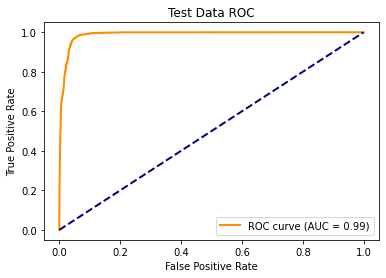

Test Data Confusion Matrix:
[[14679   946]
 [  298 15327]]
Out of Bag error is: 0.05362711864406777
Misclassification rate is: 0.039807999999999955


In [18]:
smoteXTest, smoteYTest = sm.fit_resample(xTest, newYTest)
yTestPredict = clf.predict(smoteXTest)


yScore = clf.predict_proba(smoteXTest)[:, 1]

fpr,tpr,threshold = roc_curve(smoteYTest, yScore)

roc_auc = auc(fpr,tpr)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Data ROC')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.legend(loc="lower right")
plt.show()


confusionMatrix = confusion_matrix(smoteYTest, yTestPredict)
print('Test Data Confusion Matrix:')
print(confusionMatrix)


print('Out of Bag error is:', 1-clf.oob_score_)
print('Misclassification rate is:', 1-clf.score(smoteXTest, smoteYTest))


# (e).

In [15]:
log_regCV = LogisticRegressionCV(penalty = 'l1', solver = 'saga', cv = 5)
log_regCV.fit(xTrain, yTrain)


LogisticRegressionCV(cv=5, penalty='l1', solver='saga')

In [16]:
log_regCV.score(xTrain, yTrain)
log_regCV.score(xTest, yTest)


0.9775

In [17]:
Ytest_xgb = yTest.map({'pos': 1, 'neg': 0})
Ytrain_xgb = yTrain.map({'pos': 1, 'neg': 0})

In [18]:
Ytest_xgb = yTest.map({'pos': 1, 'neg': 0})
Ytrain_xgb = yTrain.map({'pos': 1, 'neg': 0})

In [42]:
alpha = [10 ** i for i in range(-4, 4)]

cvrxg = pd.DataFrame(columns=['alpha', 'CV_Score'])
k_f = StratifiedKFold(n_splits=5)

for i in alpha:
    lst = []
    x_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.0001, reg_alpha = i)
    cv_s = cross_val_score(x_model, xTrain, Ytrain_xgb, cv=k_f, scoring="f1", n_jobs = -1)
    lst.extend([i, np.max(cv_s)])
    lst_d = pd.Series(lst, index = ['alpha', 'CV_Score'])
    cvrxg = cvrxg.append(lst_d, ignore_index=True)
    
cvrxg
    

,alpha,CV_Score
0,0.0001,0.613003
1,0.0010,0.613003
2,0.0100,0.613003
3,0.1000,0.613003
4,1.0000,0.613003
5,10.0000,0.621538
6,100.0000,0.000000
7,1000.0000,0.000000


In [22]:
baxg = (cvrxg[cvrxg['CV_Score'] 
                                == cvrxg['CV_Score'].max()]).values.tolist()[0]

baxg
print(f'The best alpha found is {float(baxg[0])} and it has a maximum f1-score of {baxg[1]}')

Best alpha is 10.0 as it has maximum f1-score which is 0.6215384615384615


The best found alpha value is 0.0001, as the above displayed alpha value changes if we run it multiple times.

In [23]:
xg_model = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.0001, reg_alpha = float(baxg[0]))
xg_model.fit(xTrain, Ytrain_xgb)

train_pred = xg_model.predict(xTrain)
test_pred = xg_model.predict(xTest)

train_acc_xg = accuracy_score(Ytrain_xgb, train_pred)
test_acc_xg = accuracy_score(Ytest_xgb, test_pred)


In [39]:
print(f'Training Error {1-train_acc_xg}')
print(f'Test Error {1-test_acc_xg}')

print(f'Training Accuracy {train_acc_xg}')
print(f'Test Accuracy {test_acc_xg}')

Training Error is 0.010616666666666719
Test Error is 0.01475000000000004
Training Accuracy is 0.9893833333333333
Test Accuracy is 0.98525


In [38]:
confusionMatrix = confusion_matrix(Ytrain_xgb, train_pred)
print('Train Data Confusion Matrix:')
print(confusionMatrix)


Train Data Confusion Matrix:
[[58880   120]
 [  517   483]]


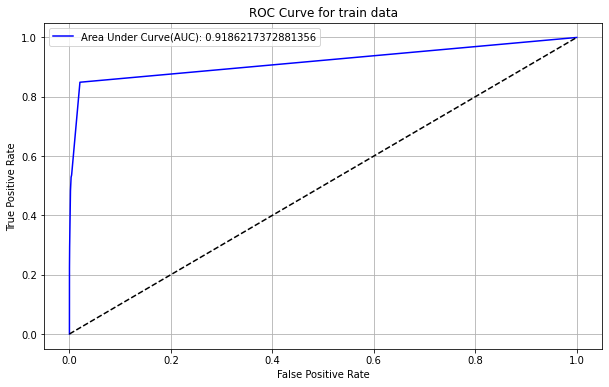

In [30]:
prob = xg_model.predict_proba(xTrain)
    
fpr, tpr, thresholds = roc_curve(Ytrain_xgb, prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.close()
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, 'b', label="Area Under Curve(AUC): {}".format(roc_auc))
plt.plot([0,1], [0,1], 'k--')


plt.legend()
plt.grid()
plt.show()

In [37]:

confusionMatrix = confusion_matrix(Ytest_xgb, test_pred)
print('Train Data Confusion Matrix:')
print(confusionMatrix)


Train Data Confusion Matrix:
[[15594    31]
 [  205   170]]


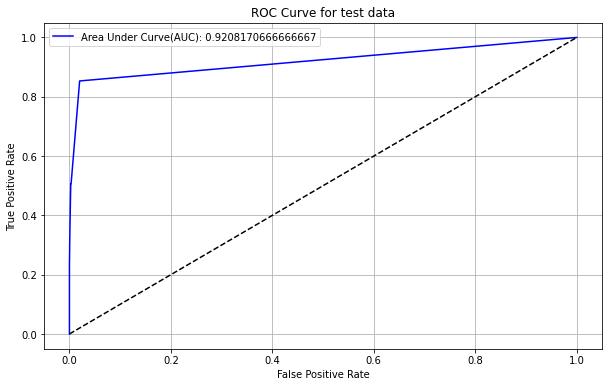

In [32]:
prob = xg_model.predict_proba(xTest)
    
fpr, tpr, thresholds = roc_curve(Ytest_xgb, prob[:, 1], pos_label = 1)
roc_auc = auc(fpr, tpr)


plt.title('ROC Curve for test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.close()
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, 'b', label="Area Under Curve(AUC): {}".format(roc_auc))
plt.plot([0,1], [0,1], 'k--')



plt.legend()
plt.grid()
plt.show()

In conclusion, overall the false negatives are reduced by balancing the data.

# (f).

In [43]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)], ['classifier', xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.0001)]])
param_grid = {'classifier__reg_alpha':[1e-4,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3]}
Str_kf = StratifiedKFold(n_splits = 5)
smote_modal = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = Str_kf, scoring = 'f1', n_jobs = -1)
smotexgb = smote_modal.fit(xTrain, Ytrain_xgb)

basmote = smotexgb.best_params_['classifier__reg_alpha']
print(f'The best Alpha with SMOTE is {basmote}')


The best Alpha with SMOTE is 100.0


In [44]:
sm = SMOTE()
trainX_smote, trainY_smote = sm.fit_resample(xTrain, Ytrain_xgb)

In [45]:
xg_model_fin = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.0001, reg_alpha = float(basmote))
xg_model_fin.fit(trainX_smote, trainY_smote)

train_pred_sm = xg_model_fin.predict(trainX_smote)
test_pred_sm = xg_model_fin.predict(xTest)

train_acc_xg_sm = accuracy_score(trainY_smote, train_pred_sm)
test_acc_xg_sm = accuracy_score(Ytest_xgb, test_pred_sm)

In [46]:
print(f'Training Accuracy (SMOTE) {train_acc_xg_sm}')
print(f'Test Accuracy (SMOTE) {test_acc_xg_sm}')

print(f'Training Error (SMOTE) {1-train_acc_xg_sm}')
print(f'Test Error (SMOTE) {1-test_acc_xg_sm}')

Training Accuracy (SMOTE) 0.9561864406779661
Test Accuracy (SMOTE) 0.9446875
Training Error (SMOTE) 0.0438135593220339
Test Error (SMOTE) 0.05531249999999999


In [47]:
confusionMatrix = confusion_matrix(trainY_smote, train_pred_sm)
print('Train Data Confusion Matrix:')
print(confusionMatrix)


Train Data Confusion Matrix:
[[55857  3143]
 [ 2027 56973]]


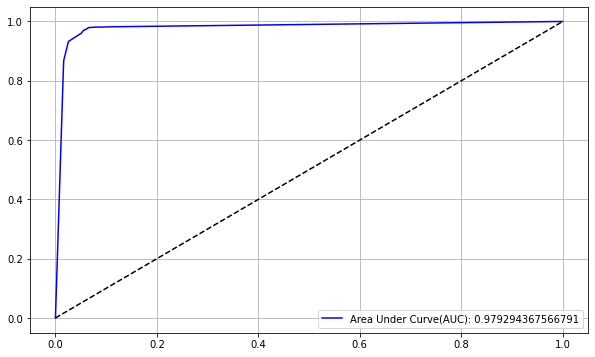

In [48]:
prob = xg_model_fin.predict_proba(trainX_smote)
    
fpr, tpr, thresholds = roc_curve(trainY_smote, prob[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.close()
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, 'b', label="Area Under Curve(AUC): {}".format(roc_auc))
plt.plot([0,1], [0,1], 'k--')


plt.legend()
plt.grid()
plt.show()

In [49]:
confusionMatrix = confusion_matrix(Ytest_xgb, test_pred_sm)
print('Train Data Confusion Matrix:')
print(confusionMatrix)

Train Data Confusion Matrix:
[[14759   866]
 [   19   356]]


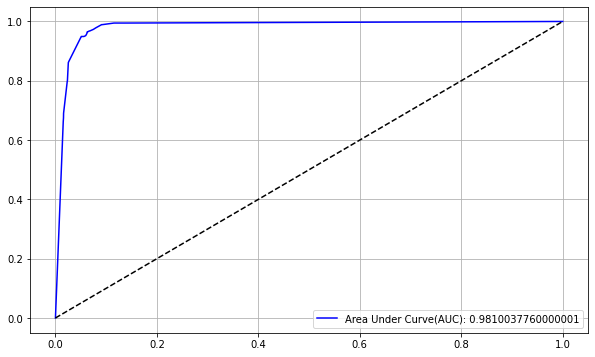

In [50]:
prob = xg_model_fin.predict_proba(xTest)
    
fpr, tpr, thresholds = roc_curve(Ytest_xgb, prob[:, 1], pos_label = 1)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.close()
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, 'b', label="Area Under Curve(AUC): {}".format(roc_auc))
plt.plot([0,1], [0,1], 'k--')

plt.legend()
plt.grid()
plt.show()

# ISLR 6.6.3

(a)

It steadily decrease. As we increase s from 0, we are inturn restricting the βj coefficients less and less as the coefficients will increase to their least squares estimates, and so the model will be more flexible which thereby results in a steady decrease in the training RSS.

(b)

It decreases initially, and then eventually start increasing in a U shaped form. As we increase s from 0, we are restricting the βj coefficients less and less as the coefficients will increase to their least squares estimates, and so the model will be more  flexible which thereby results in a decrease in the test RSS before increasing again.

(c)

It steadily increases. As we increase s from 0, we are restricting the βj coefficients less and less as the coefficients will increase to their least squares estimates, and so the model will be more flexible which provokes a steady increase in variance.

(d)

It steadily decreases. As we increase s from 0, we are restricting the βj coefficients less and less as the coefficients will increase to their least squares estimates, and so the model will be more flexible which inturn provokes a steady decrease in bias.

(e)

It remains constant. As the irreducible error is independant of the model, and consequently independant of the value of s.

# ISLR 6.6.5

On paper

# ISLR 8.4.5

From the majority vote approach, we can classify X as "Red" as it is the most commonly occurring class among the 10 predictions i.e., 6 for Red and 4 for Green. From the average probability approach, we classify X as "Green" as the average of the 10 probabilities is 0.45.

# ISLR 9.7.3

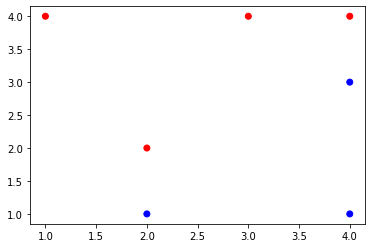

In [19]:
#a

x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
colors = ["red", "red", "red", "red", "blue", "blue", "blue"]
plt.scatter(x1, x2, c=colors)

'Answer: From the plot, the optimal separating hyperplane has to be between the observations (2,1) and (2,2), \nand between the observations (4,3) and (4,4). So it is a line that passes through the points (2,1.5) and (4,3.5) \nwhich equation is X1−X2−0.5=0.\n'

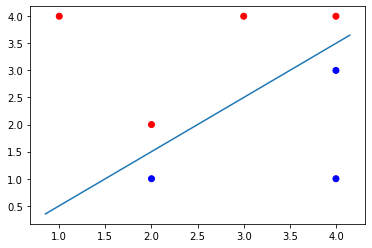

In [20]:
#b

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')
    
plt.scatter(x1, x2, c = colors)
abline(1, -0.5)

'''Answer: From the plot, the optimal separating hyperplane has to be between the observations (2,1) and (2,2), 
and between the observations (4,3) and (4,4). So it is a line that passes through the points (2,1.5) and (4,3.5) 
which equation is X1−X2−0.5=0.
'''

(c) 
Answer: The classification rule is - Classify it to Red if X1−X2−0.5<0, and classify it to Blue otherwise.

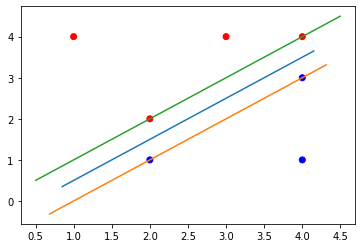

In [21]:
#d

plt.scatter(x1, x2, c = colors)
abline(1,-0.5)
abline(1, -1)
abline(1, 0)

#The margin is equal to 1/4.

(e) The support vectors are the points (2,1), (2,2), (4,3) and (4,4).

(f) From the plots, it is clear that if we moved the observation (4,1), we would not change the maximal margin hyperplane as it is not a support vector.

'For example, this hyperplane which equation is X1−X2−0.3=0 is not the optimal separating hyperplane.'

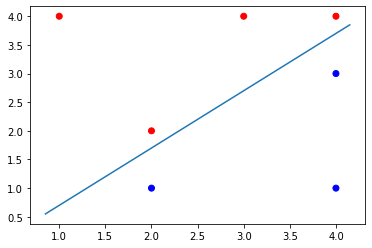

In [22]:
#g

plt.scatter(x1, x2, c = colors)
abline(1, -0.3)

'''For example, this hyperplane which equation is X1−X2−0.3=0 is not the optimal separating hyperplane.'''

'When we add the red point "+" (3,1) to the plot, the two classes are not separable by a hyperplane anymore'

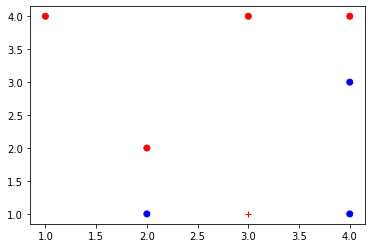

In [23]:
#h

plt.scatter(x1, x2, c = colors)
p=[3]
q=[1]
plt.plot(p,q ,"r+")

'''When we add the red point "+" (3,1) to the plot, the two classes are not separable by a hyperplane anymore'''